# Ice thermodynamics

<img src="Figures/icecubes.jpeg" width=350 height=300 />

# Part 0: Information
This is the notebook associated with the 1st lecture on ice sheet and glacier thermodynamics. It is part of the spring 2023 Glacier and Ice Sheet Dynamics course (EAS 4403/8803). The lecture is given by Vincent Verjans (vverjans3@gatech.edu).

The notebook provides the code for the temperature models analyzed in class. The first model is the analytical Robin temperature model (Robin, 1955).

# Part 1: Robin solution
In his model, Robin derived an analytical solution for the vertical temperature profile within an ice mass (Robin, 1955). This simple model includes the most influential factors on ice temperature:
- Vertical diffusion (driven by temperature gradients)
- Vertical advection (driven by downwards ice velocity)
- Geothermal heat flux (heat energy from the interior of the Earth)

To allow for the existence of an analytic expression, several simplifying assumptions are made:
- No horizontal heat advection and diffusion
- Steady-state temperature and ice thickness
- Vertical velocity profile is a linear function of depth
- No frictional heating (or lumped with the geothermal heat flux at the base)

Furthermore, the solution is only valid for frozen bed conditions (i.e., T(bed)<273.15K). Given all these assumptions, where is the Robin model approximately valid?
<img src="Figures/paperRobin1955.png" width=450 height=350 />

## What does the model depend on?
There are 4 key variables:
- The surface temperature. This is the boundary condition imposed at the top of the ice sheet.
- The total thickness of the ice column.
- The accumulation rate at the surface (i.e., snowfall rate).
- The geothermal heat flux at the base.

In addition, the model depends on the key thermodynamical properties of ice:
- Thermal conductivity
- Density
- Specific heat capacity

Note that these parameters can vary according to different properties of ice. For example: microstructure, impurity content, and temperature itself. In this notebook, we take the parameter values as constants.

| Variable/Parameter | Value | Symbol in the equations | Symbol in the code | Units |
| :---: | :---: | :---: | :---: | :---: |
| Surface temperature | Variable | $T_S$ | surfT | $K$ |
| Ice thickness | Variable | $H$ | bigH | $m$ |
| Accumulation rate | Variable | $\dot{b}$ | bdot | $m$ $s^{-1}$ |
| Geothermal heat flux | Variable | $G$ | bigG | $W$ $m^{-2}$ |
| Thermal conductivity | $2.10$ | $k$ | kcond | $W$ $m^{-1}$ $K^{-1}$ |
| Density | $917$ | $\rho_i$ | rhoi | $\textit{kg}$ $m^{-3}$ |
| Specific heat capacity | $2091$ | $c_{p}$ | cp | $J$ $\textit{kg}^{-1}$ $K^{-1}$ |
| Thermal diffusivity | $\frac{k}{\rho_{i}c_{p}}$ | $\kappa$ | kappa | $m^{2}$ $s^{-1}$ |

The analytic solution of the Robin model is (see derivation in class):
$$
T(z) = T_{S} + \frac{\sqrt{\pi}}{2} \left(\frac{\partial T}{\partial z}\right)_{z=0} \left[ \text{erf}\left(\frac{z}{q}\right)-\text{erf}\left(\frac{H}{q}\right) \right]q
$$
where $z=0$ at the base of the ice column, $q$ is defined as:
$$
q = \sqrt{\frac{2 \kappa H}{\dot{b}}}
$$
and erf is the error function:
$$
\text{erf}(x) =  \frac{2}{\sqrt{\pi}} \int_{0}^{x} \exp\left(-u^{2}\right) du
$$

<img src="Figures/erfFunction.png" width=250 height=250 />
<center><i>The erf function</i></center>

The top boundary condition is $T(z=H)=T_{S}$. This is a Dirichlet boundary condition (fixed temperature value). The bottom boundary condition is $\frac{\partial T}{\partial z} = \left(\frac{\partial T}{\partial z}\right)_{z=0}$. This is a Neumann boundary condition (fixed temperature gradient). If we neglect any frictional heating, the Neumann boundary condition is specified by the geothermal heat flux:
$$
\left(\frac{\partial T}{\partial z}\right)_{z=0} = -\frac{G}{k}
$$


From there, let's compute some temperature profiles with the python code below.


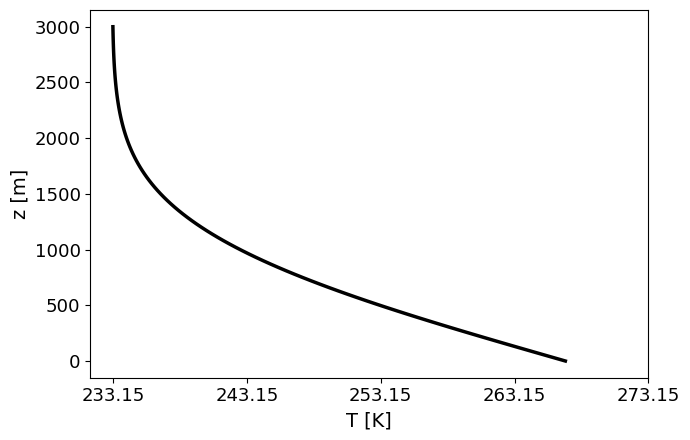

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

def robinTprofile(zz,surfT,bdot,bigG):
        '''
        Analytic temperature profile, Robin solution
        All input arguments should have SI units
        '''
        bigH    = max(abs(zz)) #ice column thickness
        kcond   = 2.10 #thermal conductivity [W m-1 K-1]
        cp      = 2091 #specific heat [J kg-1 K-1]
        rhoi    = 917 #ice density [kg m-3]
        kappa   = kcond/(rhoi*cp) #thermal diffusivity [m2 s-1]
        smallq  = np.sqrt(2*kappa*bigH/bdot)
        dtdz_b  = -1*bigG/kcond #Neumann BC
        # Compute temperature profile #
        t1erf = np.array([math.erf(abs(zval)/smallq) for zval in zz]) 
        t2erf = math.erf(bigH/smallq)
        outT  = surfT+np.sqrt(np.pi)/2*dtdz_b*(t1erf-t2erf)*smallq
        return(outT)

zgrid     = np.linspace(0,3000,101) #3000 m ice thickness with 101 grid cells
spyr      = 365.2524*24*3600 #seconds per year

### Let's compute a temperature profile ###
surfT0    = 233.15 #[K]
bdot0     = 0.12 #[m ice eq. yr-1] 
bdot0sec  = bdot0/spyr #conversion to [m ice eq. s-1] 
bigG0     = 61*1e-3 #typical geothermal heat flux [W m-2]
profileT0 = robinTprofile(zgrid,surfT0,bdot0sec,bigG0)

### Plotting ###
myxticks = np.round(np.linspace(233.15,273.15,5),decimals=2)
myzticks = np.linspace(0,3000,7).astype(int)
fig = plt.figure(figsize=[7,4.5])
ax  = plt.subplot(111)
ax.plot(profileT0,zgrid,c='k',linewidth=2.5)
ax.set_xticks(myxticks)
ax.set_xticklabels(myxticks,fontsize=13)
ax.set_yticks(myzticks)
ax.set_yticklabels(myzticks,fontsize=13)
ax.set_xlabel('T [K]',fontsize=14)
ax.set_ylabel('z [m]',fontsize=14)
fig.tight_layout()


In [15]:
## Now, we can explore the sensitivity of the model to the variables

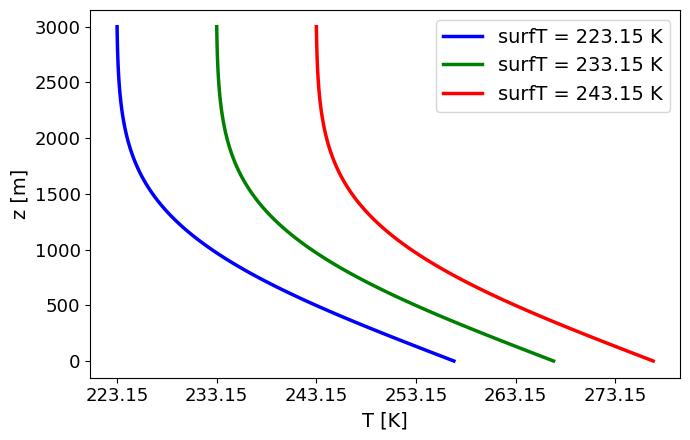

In [16]:
''' Default values '''
dft_surfT    = 233.15 #[K]
dft_bdot     = 0.12 #[m ice eq. yr-1] 
dft_bdotsec  = dft_bdot/spyr #conversion to [m ice eq. s-1] 
dft_bigG     = 61*1e-3 #[W m-2]

''' Experiment 1: different surface temperature conditions '''
exp1_surfT     = np.array([223.15,233.15,243.15]) #surface temperatures of the different tests
exp1_colors    = ['b','g','r'] #plotting colors for the different tests

# Compute the temperature profiles #
exp1_profilesT = [robinTprofile(zgrid,surfTvalue,dft_bdotsec,dft_bigG) for surfTvalue in exp1_surfT] 
fig = plt.figure(figsize=[7,4.5])
myxticks = np.round(np.linspace(223.15,273.15,6),decimals=2)
ax  = plt.subplot(111)
for pp,myprofile in enumerate(exp1_profilesT): #looping through the temperature profiles
    ax.plot(myprofile,zgrid,c=exp1_colors[pp],linewidth=2.5,label=f'surfT = {exp1_surfT[pp]} K')
ax.set_xticks(myxticks)
ax.set_xticklabels(myxticks,fontsize=13)
ax.set_yticks(myzticks)
ax.set_yticklabels(myzticks,fontsize=13)
ax.set_xlabel('T [K]',fontsize=14)
ax.set_ylabel('z [m]',fontsize=14)
ax.legend(loc='best',fontsize=14)
fig.tight_layout()


Can you see anything wrong?

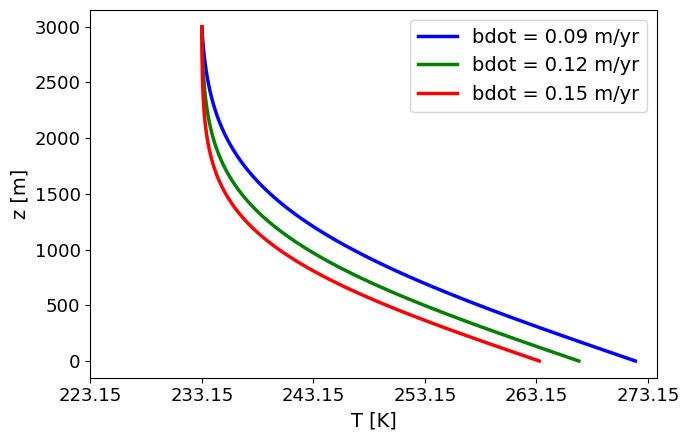

In [17]:
''' Experiment 2: different accumulation rates '''
exp2_bdot      = np.array([0.09,0.12,0.15]) #accumulation rates of the different tests [m ice eq. yr-1]
exp2_bdotsec   = exp2_bdot/spyr #conversion to [m ice eq. s-1] 
exp2_colors    = ['b','g','r'] #plotting colors for the different tests

# Compute the temperature profiles #
exp2_profilesT = [robinTprofile(zgrid,dft_surfT,bdotvalue,dft_bigG) for bdotvalue in exp2_bdotsec] 
fig = plt.figure(figsize=[7,4.5])
myxticks = np.round(np.linspace(223.15,273.15,6),decimals=2)
ax  = plt.subplot(111)
for pp,myprofile in enumerate(exp2_profilesT): #looping through the temperature profiles
    ax.plot(myprofile,zgrid,c=exp2_colors[pp],linewidth=2.5,label=f'bdot = {exp2_bdot[pp]} m/yr')
ax.set_xticks(myxticks)
ax.set_xticklabels(myxticks,fontsize=13)
ax.set_yticks(myzticks)
ax.set_yticklabels(myzticks,fontsize=13)
ax.set_xlabel('T [K]',fontsize=14)
ax.set_ylabel('z [m]',fontsize=14)
ax.legend(loc='best',fontsize=14)
fig.tight_layout()

Why does accumulation influence the temperature profile in this way? What do you expect if we set bdot (very close) to zero?

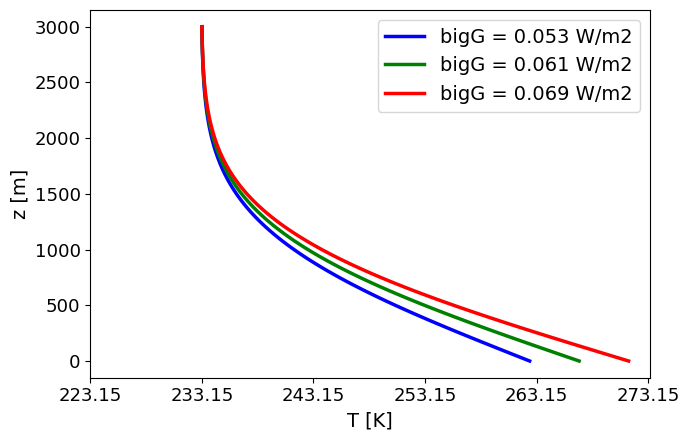

In [18]:
''' Experiment 3: different geothermal heat fluxes '''
exp3_bigG      = 1e-3*np.array([53,61,69]) #typical geothermal heat flux values in Antarctica [W m-2]
exp3_colors    = ['b','g','r'] #plotting colors for the different tests

# Compute the temperature profiles #
exp3_profilesT = [robinTprofile(zgrid,dft_surfT,dft_bdotsec,bigGvalue) for bigGvalue in exp3_bigG] 
fig = plt.figure(figsize=[7,4.5])
myxticks = np.round(np.linspace(223.15,273.15,6),decimals=2)
ax  = plt.subplot(111)
for pp,myprofile in enumerate(exp3_profilesT): #looping through the temperature profiles
    ax.plot(myprofile,zgrid,c=exp3_colors[pp],linewidth=2.5,label=f'bigG = {exp3_bigG[pp]} W/m2')
ax.set_xticks(myxticks)
ax.set_xticklabels(myxticks,fontsize=13)
ax.set_yticks(myzticks)
ax.set_yticklabels(myzticks,fontsize=13)
ax.set_xlabel('T [K]',fontsize=14)
ax.set_ylabel('z [m]',fontsize=14)
ax.legend(loc='best',fontsize=14)
fig.tight_layout()

Notice how different geothermal heat flux values, which are typical of Antarctic conditions, result in strong temperature differences in the bottom 500 m. Why is that particularly important?

# References
- Robin, G. de Q.: Ice movement and temperature distribution in glaciers and ice sheets, J. Glaciol., 2, 523–532, https://doi.org/10.3189/002214355793702028, 1955.